In [116]:
import pandas as pd
import numpy as np
import datetime as dt
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# How many distinctive career trajectories are there?
- use clustering on growth trajectories. Make key stats the vectors.

In [2]:
#Read in player logs
hist_player_log_full = pd.read_csv('hist_player_log.csv')
#Read in player info
hist_player_info = pd.read_csv('hist_player_info.csv', parse_dates=['BIRTHDATE'])

In [3]:
hist_player_info.head()

,PERSON_ID,BIRTHDATE,FROM_YEAR,HEIGHT,WEIGHT,POSITION,full_name
0,203518,1993-08-01,2016,NaN,NaN,NaN,Alex Abrines
1,203112,1990-10-06,2012,NaN,NaN,NaN,Quincy Acy
2,1629121,1996-05-04,2018,74.0,190.0,Guard,Jaylen Adams
3,203919,1994-07-08,2014,77.0,209.0,Guard,Jordan Adams
4,203500,1993-07-20,2013,84.0,265.0,Center,Steven Adams


In [4]:
#We have player data from 2015-2016 season onwards.
#how many complete (as of today) careers do we have?
len(hist_player_log_full[hist_player_log_full['SEASON_ID']==hist_player_log_full.agg({'SEASON_ID' : 'min'})[0]]['Player_ID'].unique())
full_careers = hist_player_log_full[hist_player_log_full['SEASON_ID']==hist_player_log_full.agg({'SEASON_ID' : 'min'})[0]]['Player_ID'].unique()
#476 unique players careers.
#We should grab more data so we have more complete careers (15 years of player careers would be ideal)

# To do list:
- Grab more player data. We want to go back to 2000 so we have more complete careers.

In [5]:
hist_player_log_full.head()

,SEASON_ID,Player_ID,Game_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,...,PTS,PLUS_MINUS,VIDEO_AVAILABLE,full_name,PERSON_ID,BIRTHDATE,FROM_YEAR,HEIGHT,WEIGHT,POSITION
0,22018,203518,21800493,"DEC 23, 2018",OKC vs. MIN,L,27,2,6,0.333,...,7,1,1,Alex Abrines,203518,1993-08-01T00:00:00,2016,NaN,NaN,NaN
1,22018,203518,21800485,"DEC 22, 2018",OKC @ UTA,W,16,2,4,0.500,...,6,13,1,Alex Abrines,203518,1993-08-01T00:00:00,2016,NaN,NaN,NaN
2,22018,203518,21800466,"DEC 19, 2018",OKC @ SAC,W,23,3,7,0.429,...,9,6,1,Alex Abrines,203518,1993-08-01T00:00:00,2016,NaN,NaN,NaN
3,22018,203518,21800447,"DEC 17, 2018",OKC vs. CHI,W,14,3,4,0.750,...,8,4,1,Alex Abrines,203518,1993-08-01T00:00:00,2016,NaN,NaN,NaN
4,22018,203518,21800434,"DEC 15, 2018",OKC vs. LAC,W,20,2,4,0.500,...,6,7,1,Alex Abrines,203518,1993-08-01T00:00:00,2016,NaN,NaN,NaN


In [6]:
hist_player_log_full.columns

Index(['SEASON_ID', 'Player_ID', 'Game_ID', 'GAME_DATE', 'MATCHUP', 'WL',
       'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA',
       'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS', 'PLUS_MINUS', 'VIDEO_AVAILABLE', 'full_name', 'PERSON_ID',
       'BIRTHDATE', 'FROM_YEAR', 'HEIGHT', 'WEIGHT', 'POSITION'],
      dtype='object')

In [7]:
stat_columns = ['FGM', 'FG3M', 'FTM', 'REB', 'AST', 'STL', 'BLK', 'PTS']

In [8]:
hist_player_log_full.groupby(['full_name', 'SEASON_ID']).agg({k: 'sum' for k in stat_columns}).head()

FGM  FG3M  FTM  REB  AST  STL  BLK  PTS
full_name    SEASON_ID                                         
AJ Hammons   22016       17     5    9   36    4    1   13   48
Aaron Brooks 22015      188    66   49  101  180   30   10  491
             22016      121    48   32   69  125   25    9  322
             22017       28    11    8   17   20    6    0   75
             42016        2     1    0    1    1    0    0    5

In [9]:
hist_player_log_full['Date'] = hist_player_log_full['GAME_DATE'].apply(lambda x: datetime.strptime(x, '%b %d, %Y'))

In [10]:
hist_player_log_full['date_rank'] = hist_player_log_full.groupby('full_name')['Date'].rank('dense', ascending=True)

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


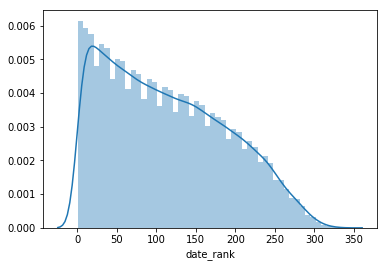

In [11]:
#Distribution of amount of games played in career so far for players with full career data
sns.distplot(hist_player_log_full[hist_player_log_full['Player_ID'].isin(full_careers)]['date_rank'])

In [12]:
#Pick interval of 100 , 200 , 300, 400+ games cumulative. (rolling)

In [14]:
hist_player_log_full.head()

,SEASON_ID,Player_ID,Game_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,...,VIDEO_AVAILABLE,full_name,PERSON_ID,BIRTHDATE,FROM_YEAR,HEIGHT,WEIGHT,POSITION,Date,date_rank
0,22018,203518,21800493,"DEC 23, 2018",OKC vs. MIN,L,27,2,6,0.333,...,1,Alex Abrines,203518,1993-08-01T00:00:00,2016,NaN,NaN,NaN,2018-12-23,183.0
1,22018,203518,21800485,"DEC 22, 2018",OKC @ UTA,W,16,2,4,0.500,...,1,Alex Abrines,203518,1993-08-01T00:00:00,2016,NaN,NaN,NaN,2018-12-22,182.0
2,22018,203518,21800466,"DEC 19, 2018",OKC @ SAC,W,23,3,7,0.429,...,1,Alex Abrines,203518,1993-08-01T00:00:00,2016,NaN,NaN,NaN,2018-12-19,181.0
3,22018,203518,21800447,"DEC 17, 2018",OKC vs. CHI,W,14,3,4,0.750,...,1,Alex Abrines,203518,1993-08-01T00:00:00,2016,NaN,NaN,NaN,2018-12-17,180.0
4,22018,203518,21800434,"DEC 15, 2018",OKC vs. LAC,W,20,2,4,0.500,...,1,Alex Abrines,203518,1993-08-01T00:00:00,2016,NaN,NaN,NaN,2018-12-15,179.0


In [50]:
#Form data into growth vector format (wide)
player_1 = hist_player_log_full[hist_player_log_full['date_rank']<=100].groupby(['Player_ID']).\
        agg({k: np.sum for k in stat_columns}).\
        rename(lambda c: 'career_first_' + c, axis = 1).reset_index()
player_2 = hist_player_log_full[hist_player_log_full['date_rank']<=200].groupby(['Player_ID']).\
        agg({k: np.sum for k in stat_columns}).\
        rename(lambda c: 'career_second_' + c, axis = 1).reset_index()
player_3 = hist_player_log_full[hist_player_log_full['date_rank']<=300].groupby(['Player_ID']).\
        agg({k: np.sum for k in stat_columns}).\
        rename(lambda c: 'career_third_' + c, axis = 1).reset_index()
player_4 = hist_player_log_full.groupby(['Player_ID']).\
        agg({k: np.sum for k in stat_columns}).\
        rename(lambda c: 'career_last_' + c, axis = 1).reset_index()
player_stat_df = player_1.merge(player_2, on='Player_ID', how='left').merge(player_3, on='Player_ID', how='left').merge(player_4, on='Player_ID', how='left')
player_stat_df[player_stat_df['Player_ID']==202695]

,Player_ID,career_first_FGM,career_first_FG3M,career_first_FTM,career_first_REB,career_first_AST,career_first_STL,career_first_BLK,career_first_PTS,career_second_FGM,...,career_third_BLK,career_third_PTS,career_last_FGM,career_last_FG3M,career_last_FTM,career_last_REB,career_last_AST,career_last_STL,career_last_BLK,career_last_PTS
253,202695,778,181,453,664,269,193,94,2190,1639,...,172,5035,1750,388,1147,1391,656,388,172,5035


In [152]:
#Min max normalisation on each players growth vector, to squeeze between 0 and 1.
normfn<-function(x) {
  if((max(x)==min(x))) {xy <- rep(0,length(x)) # treat constants
  } else
  {xy <- (x - min(x))/(max(x)-min(x))
  }
  return(xy)
}


In [106]:
def normfn(x):
    if x.max()==x.min():
        xy = x*0
    else:
        xy = (x-x.min())/(x.max()-x.min())
    return(xy)

In [108]:
for i in player_stat_df['Player_ID'].unique():
    for j in stat_columns:
        wanted_cols = [col for col in player_stat_df.columns if j in col]
        #0,1 normalised the player career vector
        normalised = player_stat_df[player_stat_df['Player_ID']==i][wanted_cols].apply(normfn, axis=1)
        row_index = player_stat_df[player_stat_df['Player_ID']==i].index
        for k in range(0,len(normalised.columns)):
            player_stat_df.loc[row_index, wanted_cols[k]] = normalised.iloc[0][k]

In [109]:
player_stat_df[player_stat_df['Player_ID']==202695][wanted_cols].apply(normfn, axis=1)

,career_first_PTS,career_second_PTS,career_third_PTS,career_last_PTS
253,0.0,0.887873,1.0,1.0


In [111]:
player_stat_df.head()

,Player_ID,career_first_FGM,career_first_FG3M,career_first_FTM,career_first_REB,career_first_AST,career_first_STL,career_first_BLK,career_first_PTS,career_second_FGM,...,career_third_BLK,career_third_PTS,career_last_FGM,career_last_FG3M,career_last_FTM,career_last_REB,career_last_AST,career_last_STL,career_last_BLK,career_last_PTS
0,708,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,977,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1713,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.686154,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1717,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.897849,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


# K-Means clustering check

In [119]:
from sklearn.cluster import KMeans
rss_dist = []

for k in range(1,15):
    km = KMeans(n_clusters=k)
    km = km.fit(player_stat_df[player_stat_df['Player_ID'].isin(full_careers)].drop('Player_ID', axis=1))
    rss_dist.append(km.inertia_)


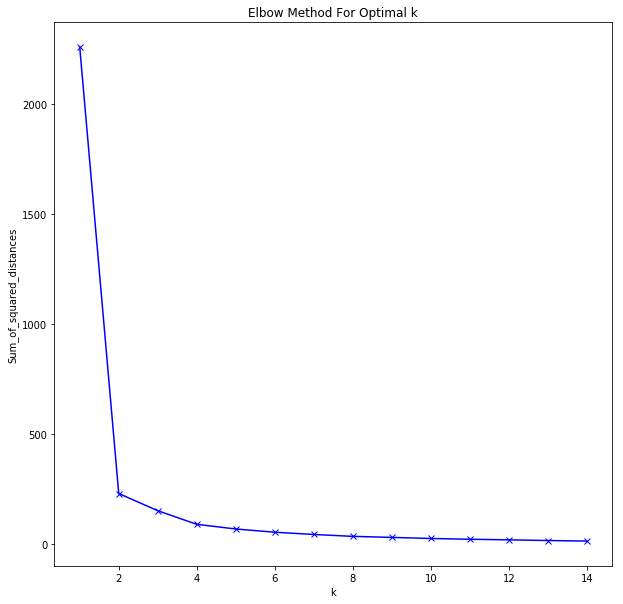

In [124]:
plt.figure(figsize=(10,10))
plt.plot(K, rss_dist, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [125]:
#First crack suggests only one meaningful cluster (not helpful)
#Grab more data